### Story of the DataSet:

Nowadays, network systems play a critical role in all areas, from banking to education, and from healthcare to government institutions. However, these systems have become more vulnerable to cyberattacks than ever before. As a result, intrusion detection has become one of the most important components of cybersecurity.

The UNSW-NB15 dataset was created to enable researchers and developers to design intrusion detection algorithms based on network traffic that closely resembles real-world conditions.

#### Who Created It?
- The dataset was generated by the Cyber Range Lab at the University of New South Wales (UNSW) in Australia.
- The IXIA PerfectStorm simulator was used for data generation.
- The dataset was created in 2015 and is still frequently used in academic publications today.

#### How Was the Data Collected?
To create realistic network traffic, both normal user behaviors and cyberattacks were simulated.
The simulations were run at different times and on different days to generate data spread across various time periods.
Network traffic data was collected to include both normal connections and nine different types of attacks.

#### Types of Attacks Included:

- **Fuzzers**

- **Analysis**

- **Backdoors**

- **DoS (Denial of Service)**

- **Exploits**

- **Generic**

- **Reconnaissance**

- **Shellcode**

- **Worms**

This diversity makes the dataset suitable for working with both supervised and unsupervised learning techniques.

#### Data Characteristics:


- **Feature	Description:**
Total number of samples	2,540,044
- **Labeled data**	Yes (label: 0 = normal, 1 = attack)
- **Categorical and numerical columns:**	Includes protocol types, service types, byte counts, timestamps, connection durations, and routing features
- **File structure:**	Training and testing sets are provided separately


### Objective:
To test whether cyberattacks can be detected as anomalies using unsupervised methods, without utilizing the "normal" and "attack" labels provided in the dataset.

#### **1. Data Load**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **2. Initial Data Analyze**

In [ ]:
df = pd.read_csv("/content/sample_data/UNSW_NB15_training-set.csv")

In [ ]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
# Checking whether the data types are appropriate for their nature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
df.shape

(82332, 45)

In [ ]:
df_num = df.select_dtypes(include = ['float', 'int'])

In [ ]:
def compare(df1_num, df2_all):
  number = []
  new = []
  for i in df1_num.columns:
    number.append(i)
  for j in df2_all.columns:
    new.append(j)
  if len(number) == len(new):
    print("No categorical data dropped from the dataset!")
  else:
    print(f"New non-cat dataset features count : {len(new)}")

In [ ]:
compare(df_num,df)

New non-cat dataset features count : 45


In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,82332.0,4.116650e+04,2.376735e+04,1.0,20583.750000,4.116650e+04,6.174925e+04,8.233200e+04
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09


#### **3. NULL Value Detection**

In [ ]:
df_num.isnull().sum()

,0
id,0
dur,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0
sttl,0
dttl,0
sload,0


#### **4. Drawing a sample from the population**

In [ ]:
normal = df_num[df_num['label'] == 0].sample(2000, random_state=42)
attack = df_num[df_num['label'] == 1].sample(500, random_state = 42)
df_sample = pd.concat([normal, attack]).sample(frac=1, random_state=42)

In [ ]:
df_sample.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
78053,78054,0.000000,1,0,46,0,0.000000e+00,0,0,0.000000e+00,...,1,1,1,0,0,0,1,1,1,0
36477,36478,0.001001,2,2,146,178,2.997003e+03,31,29,5.834166e+05,...,1,1,1,0,0,0,2,5,0,0
79918,79919,1.250565,10,10,818,1360,1.519313e+01,62,252,4.714669e+03,...,1,1,1,0,0,1,1,1,0,0
17060,17061,0.000010,2,0,114,0,1.000000e+05,254,0,4.560000e+07,...,19,19,36,0,0,0,19,36,0,1
80836,80837,0.000001,2,0,90,0,1.000000e+06,254,0,3.600000e+08,...,1,1,12,0,0,0,3,12,0,0


In [ ]:
df_sample.shape

(2500, 41)

In [ ]:
X = df_sample.drop('label', axis = 1)
y = df_sample['label']

#### **5. Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **6. Applying DBSCAN Algorithm and Visualization with Nearest Neighbors**

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_preds = (dbscan.fit_predict(X_scaled) == -1).astype(int)

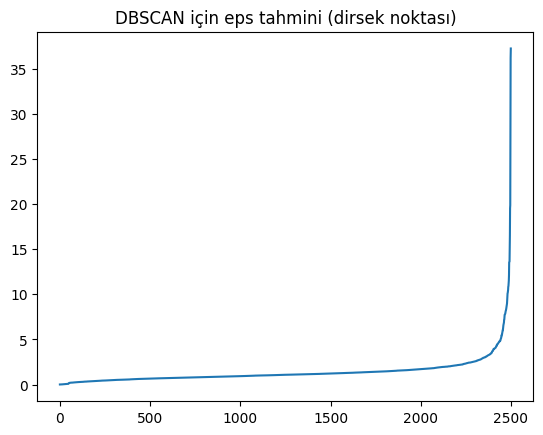

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Nearest Neigbor distance :
distances = np.sort(distances[:,4])
plt.plot(distances)
plt.title("DBSCAN için eps tahmini (dirsek noktası)")
plt.show()

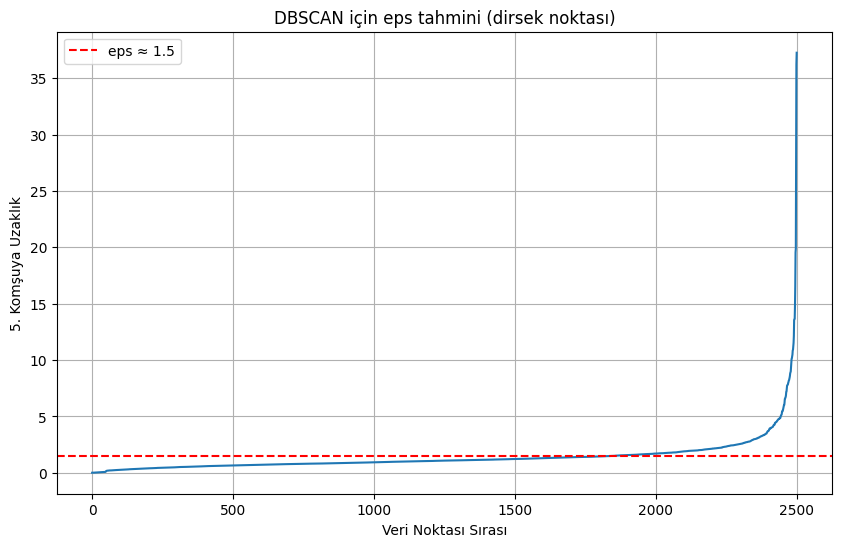

In [ ]:
# K - distance plot with EPS prediction line
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--', label='eps ≈ 1.5')
plt.title("DBSCAN için eps tahmini (dirsek noktası)")
plt.xlabel("Veri Noktası Sırası")
plt.ylabel("5. Komşuya Uzaklık")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Silhouette Score :

from sklearn.metrics import silhouette_score

best_score = -1
for eps in [0.1, 0.5, 1.0, 1.5]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    if len(np.unique(labels)) > 1:  # En az 2 küme varsa
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_eps = eps
print("Best eps:", best_eps)

Best eps: 1.5


#### **7. Applying Isolation Forest Algorithm and PCA Visualization**

In [ ]:
# Isolation Forest :
from sklearn.ensemble import IsolationForest

iso_model = IsolationForest(contamination=0.2, random_state=42)
iso_preds = (iso_model.fit_predict(X_scaled) == -1).astype(int)

In [ ]:
# PCA Visualization:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

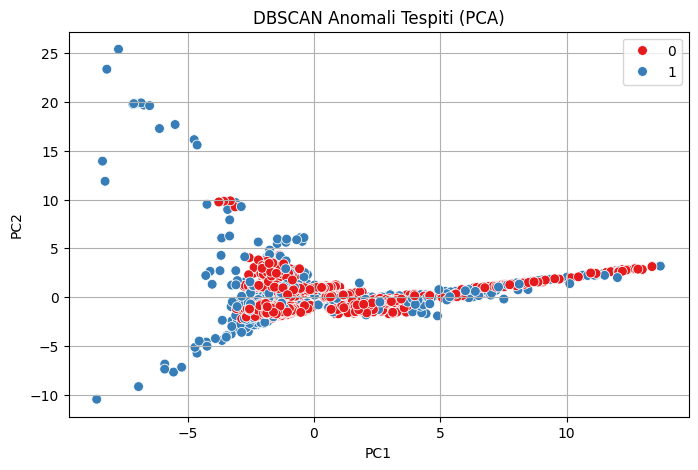

In [ ]:
# DBSCAN Plot

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_preds, palette="Set1", s=50)
plt.title("DBSCAN Anomali Tespiti (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

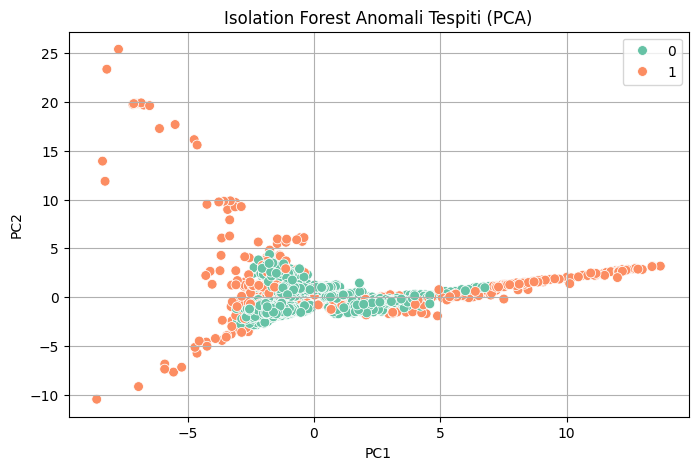

In [ ]:
# Isolation Forest Plot

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=iso_preds, palette="Set2", s=50)
plt.title("Isolation Forest Anomali Tespiti (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

#### **8. Comparison of Model Performances**

In [ ]:
# Comparison :
from sklearn.metrics import confusion_matrix, classification_report

print("=== DBSCAN ===")
print(confusion_matrix(y, db_preds))
print(classification_report(y, db_preds))

print("\n=== Isolation Forest ===")
print(confusion_matrix(y, iso_preds))
print(classification_report(y, iso_preds))

=== DBSCAN ===
[[1666  334]
 [ 353  147]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2000
           1       0.31      0.29      0.30       500

    accuracy                           0.73      2500
   macro avg       0.57      0.56      0.56      2500
weighted avg       0.72      0.73      0.72      2500


=== Isolation Forest ===
[[1645  355]
 [ 355  145]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2000
           1       0.29      0.29      0.29       500

    accuracy                           0.72      2500
   macro avg       0.56      0.56      0.56      2500
weighted avg       0.72      0.72      0.72      2500



#### **9. Result :**

##### Confussion Matrix :

From the confussion matrix, we can state that:
- DBSCAN correctly identified **147** out of **500** attacks.
- Isolation Forest correctly identified **145** out of **500** attacks.

There is a small difference between the predictions of DBSCAN and Isolation Forest. This indicates that there is no significant difference between the two methods.

##### Accuracy :
- **DBSCAN Accuracy :** 0.73
- **Isolation Forest Accuracy :** 0.72

From the accuracy, we can state that DBSCAN and Isolation Forest have nearly the same overall prediction performance.

##### Recall :
- **DBSCAN Recall (for Class 1):** 0.29
- **Isolation Forest Recall (for class 1):** 0.29

From the recall values, we can state that DBSCAN and Isolation Forest have similar true positive detection performance. In other words, recall indicates how many actual attacks were correctly predicted.

##### Precision :

- **DBSCAN Precision :** 0.31
- **Isolation Forest Pecision :** 0.29

From the precision, we can state that DBSCAN is more effective than Isolation Forest in detecting attacks.

##### F1 Score :

- **DBSCAN F1 Score :** 0.30
- **Isolation Forest F1 Socre :** 0.29

From the F1 Socre, we can state that DBSCAN is more effective than Isolation Forest in detecting attacks.


In conclusion, DBSCAN and Isolation Forest show similar results in detecting attacks. When we look at the confusion matrix, accuracy, recall, precision, and F1-score, DBSCAN is slightly better than Isolation Forest, especially in precision and F1-score. However, the difference between the two methods is very small. As a result, both algorithms can be used for attack detection in this dataset, with DBSCAN having a small advantage.